In [1]:
import os
from pyprojroot import here
project_root = here()
print(f"Changing working directory to {project_root}")
os.chdir(project_root)


Changing working directory to /home/ptr/workspace/technikum/technikum-big-data


# Subtitle segmentation



In [2]:
from bigchina.analyzer import *

tiger = segment_subtitle_file("data/subtitles/Tiger.Dragon.srt")
tiger

,segment,characteristic,is_punctuation,sentence,sentence_word_id
0,喲,noun,False,0,0
1,!,punctuation mark,True,1,0
3,李,noun,False,1,1
4,爺,noun,False,1,2
5,來,noun,False,1,3
...,...,...,...,...,...
10985,.,punctuation mark,True,1799,0
10987,一起,locative word,False,1799,1
10988,回,verb,False,1799,2
10989,新疆,noun,False,1799,3


In [3]:
tiger.characteristic.value_counts()

noun                    3504
punctuation mark        1800
verb                    1439
pronoun                  889
adverb                   568
particle                 416
adjective                295
modal particle           228
preposition              221
classifier               139
numeral                  135
conjunction               68
noun of locality          65
distinguishing word       53
time word                 42
interjection              14
locative word             12
multiword expression       4
suffix                     2
prefix                     2
Name: characteristic, dtype: int64

<AxesSubplot:xlabel='characteristic'>

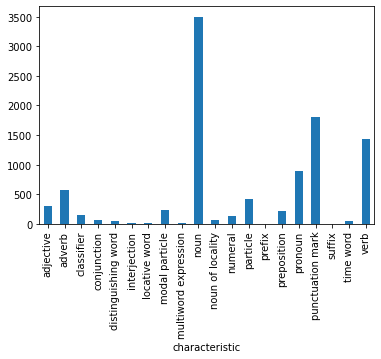

In [4]:
tiger.groupby("characteristic")["segment"].count().plot.bar()

In [5]:
df = tiger[tiger.characteristic != "punctuation mark"]
df = df.groupby("segment").count().reset_index()[["segment", "characteristic"]]

df = df.rename(columns = {"segment": "word", "characteristic": "count"})

df.sort_values("count", ascending=False).head(20)

,word,count
633,我,331
128,你,295
959,的,290
750,是,211
78,了,199
43,不,169
1266,這,145
134,來,108
513,就,96
767,有,90


In [6]:
df

,word,count
0,!,0
1,?,0
2,一,75
3,一.,1
4,一下,4
...,...,...
1397,黑暗,1
1398,點,15
1399,黨,1
1400,齋,1


In [7]:
import bigchina

unihan = bigchina.load_data()

Reading unihan files...
Spreading Unihan columns...
Encoding Unicode notations...
Splitting radical column...
Reading HSK files...
Merging Unihan with HSK dataframe...


In [8]:
unihan = unihan[["glyph", 'kDefinition', 'kMandarin']]
unihan

,glyph,kDefinition,kMandarin
0,𠀀,the sound made by breathing in; oh! (cf. U+311...,hē
1,𠀁,the original form for 七 U+4E03,qī
2,𠀂,NaN,NaN
3,𠀃,NaN,qiě
4,𠀄,NaN,NaN
...,...,...,...
93853,𥉉,NaN,NaN
93854,𥳐,NaN,NaN
93855,𧻓,NaN,NaN
93856,齃,NaN,NaN


In [9]:
df = df.merge(unihan, how="left", left_on="word", right_on="glyph")
df.sort_values("count", ascending=False).head(20)

,word,count,glyph,kDefinition,kMandarin
633,我,331,我,"our, us, i, me, my, we",wǒ
128,你,295,你,"you, second person pronoun",nǐ
959,的,290,的,"possessive, adjectival suffix",de
750,是,211,是,"indeed, yes, right; to be; demonstrative prono...",shì
78,了,199,了,to finish; particle of completed action,le
43,不,169,不,"no, not; un-; negative prefix",bù
1266,這,145,這,"this, the, here",zhè
134,來,108,來,"come, coming; return, returning",lái
513,就,96,就,"just, simply; to come, go to; to approach, near",jiù
767,有,90,有,"have, own, possess; exist",yǒu


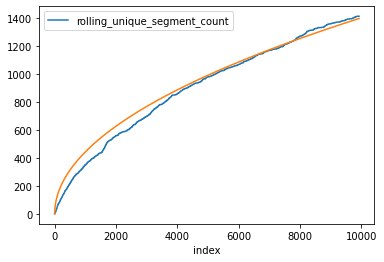

In [25]:
from bigchina.analyzer import rolling_unique_count
import numpy
import matplotlib.pyplot as plt

tiger = rolling_unique_count(tiger, "segment")
tiger.reset_index().plot(x='index', y='rolling_unique_segment_count')
plt.plot(tiger.index, numpy.sqrt(tiger.index)*14)